# Benchmark: Magnetic field sensor
## Introduction
### Purpose
The purpose of this test case is to evaluate the capabilities of the simulation tool with respect to the magnetization in small elements as found in magnetic field sensors. The test case focuses on quasi-static behaviour.
### Description
Key performance parameters of magnetoresistive magnetic field sensors are defined by the response of the magnetisation in the sense element to the external field. The objective of this test case is to study the behaviour of the magnetisation in a small magnetic element representing the free layer in a TMR sensor when subjected to quasi-static field sweeps along different axes.

Figure 1 depicts the geometry of the exemplary magnetic element. Using length $l = 3.5$ μm and width $w = 1$ μm the shape of the magnetic element is defined by two Bézier curves with control points $(-l/2, 0)$, $(0, ±w)$ and $(l/2, 0)$. The thickness shall be $t = 10$ nm.

![title](Figure1.png)
**Figure 1: Geometry of magnetic element, top view (left). Construction of the outline using Bézier curve (right).**

As a material Permalloy shall be assumed. In case of micromagnetic simulation of the sense element typical material parameters are $M_\mathrm{s} = 800$ kA/m and $A = 1.3e-11$ J/m.

### Applied stimuli
Prior to sweeping the field, set the initial state of the element by applying a saturating field along the (1, 0, 0) axis and reducing it to 0. - **SKIPPED**

The following field sweeps shall be applied:
1. (1, 0, 0) axis (easy axis): + 25 kA/m ... - 25 kA/m ... + 25 kA/m
2. (√2, √2, 0) axis: + 25 kA/m ... - 25 kA/m ... + 25 kA/m
3. (0, 1, 0) axis (hard axis = sensing axis):  + 25 kA/m ... - 25 kA/m ... + 25 kA/m

Use a step size of 400 A/m or smaller.

In [1]:
import numpy as np

import mammos_entity as me
import mammos_units as u
from mammos_mumag import hysteresis
from mammos_mumag.hysteresis import read_result
from mammos_mumag.materials import Materials
from mammos_mumag.parameters import Parameters
from mammos_mumag.simulation import Simulation
from mammos_mumag.mesh import Mesh

u.set_enabled_equivalencies(u.magnetic_flux_field());

### Setting up mesh and material parameters

In [2]:
mesh = Mesh("meshes/Sensor35_10_10nmMesh2_5nm.fly")

In [3]:
mat = Materials(
    domains=[
        {  # sensor Permalloy
            "theta": 0.0,
            "phi": 0.0,
            "K1": me.Ku(0.0, unit=u.J / u.m**3),
            "K2": me.Ku(0.0, unit=u.J / u.m**3),
            "Ms": me.Ms(0.8e6, unit=u.A / u.m),
            "A": me.A(1.3e-11, unit=u.J / u.m),
        },
        {  # air sphere
            "theta": 0.0,
            "phi": 0.0,
            "K1": me.Ku(0.0, unit=u.J / u.m**3),
            "K2": me.Ku(0.0, unit=u.J / u.m**3),
            "Ms": me.Ms(0.0, unit=u.A / u.m),
            "A": me.A(0.0, unit=u.J / u.m),
        },
        {  # shell
            "theta": 0.0,
            "phi": 0.0,
            "K1": me.Ku(0.0, unit=u.J / u.m**3),
            "K2": me.Ku(0.0, unit=u.J / u.m**3),
            "Ms": me.Ms(0.0, unit=u.A / u.m),
            "A": me.A(0.0, unit=u.J / u.m),
        },
    ],
)

## First sweep

Example is at the moment running with parameters for the following field sweep:

1. (1, 0, 0) axis (easy axis): + 25 kA/m ... - 25 kA/m ... + 25 kA/m

But with an increased field range from 300 kA/m to -300 kA/m in order to reach the saturation, since it is not yet possible to use a previously simulated state as an input for mammos-mumag.

In [4]:
par = Parameters(
    size=1.0e-9,
    scale=0,
    m_vect=[1, 0, 0],
    h_start=me.H(300, unit="kA/m"),
    h_final=me.H(-300, unit="kA/m"),
    h_step=me.H(-400, unit="A/m"),
    h_vect=[1, 0, 0],
    m_step=(0.4 * u.T).to("A/m"),
    m_final=(-2 * u.T).to("A/m"),
    tol_fun=1e-10,
    tol_h_mag_factor=1,
    precond_iter=10,
)

sim = Simulation(
    mesh=mesh,
    materials=mat,
    parameters=par,
)

In [5]:
%%time
sim.run_loop(outdir='sweep_1', name="sensor")

CPU times: user 28 ms, sys: 16.8 ms, total: 44.8 ms
Wall time: 7min 2s


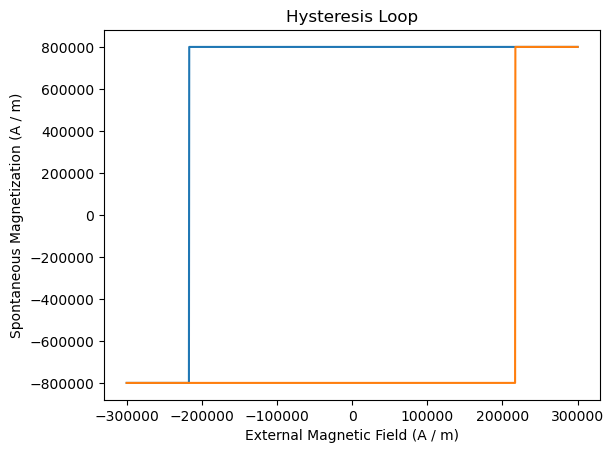

In [6]:
results = read_result(outdir="sweep_1", name="sensor")
results.plot();

## Second sweep

Axis (√2, √2, 0)

Field range: [-300 kA/m, 300 kA/m]

In [7]:
par = Parameters(
    size=1.0e-9,
    scale=0,
    m_vect=[1, 0, 0],
    h_start=me.H(300, unit="kA/m"),
    h_final=me.H(-300, unit="kA/m"),
    h_step=me.H(-400, unit="A/m"),
    h_vect=[np.sqrt(2), np.sqrt(2), 0],
    m_step=(0.4 * u.T).to("A/m"),
    m_final=(-2 * u.T).to("A/m"),
    tol_fun=1e-10,
    tol_h_mag_factor=1,
    precond_iter=10,
)

sim = Simulation(
    mesh=mesh,
    materials=mat,
    parameters=par,
)

In [8]:
%%time
sim.run_loop(outdir='sweep_2', name="sensor")

CPU times: user 139 ms, sys: 19.7 ms, total: 159 ms
Wall time: 36min 15s


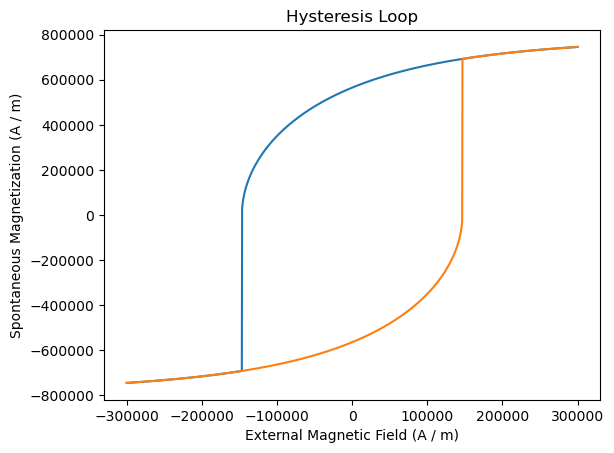

In [9]:
results = read_result(outdir="sweep_2", name="sensor")
results.plot();

## Third sweep

Axis (0, 1, 0)

Field range: [-300 kA/m, 300 kA/m]

In [11]:
par = Parameters(
    size=1.0e-9,
    scale=0,
    m_vect=[1, 0, 0],
    h_start=me.H(300, unit="kA/m"),
    h_final=me.H(-300, unit="kA/m"),
    h_step=me.H(-400, unit="A/m"),
    h_vect=[0, 1, 0],
    m_step=(0.4 * u.T).to("A/m"),
    m_final=(-2 * u.T).to("A/m"),
    tol_fun=1e-10,
    tol_h_mag_factor=1,
    precond_iter=10,
)

sim = Simulation(
    mesh=mesh,
    materials=mat,
    parameters=par,
)

In [12]:
%%time
sim.run_loop(outdir='sweep_3', name="sensor")

CPU times: user 383 ms, sys: 64.2 ms, total: 447 ms
Wall time: 1h 29min 4s


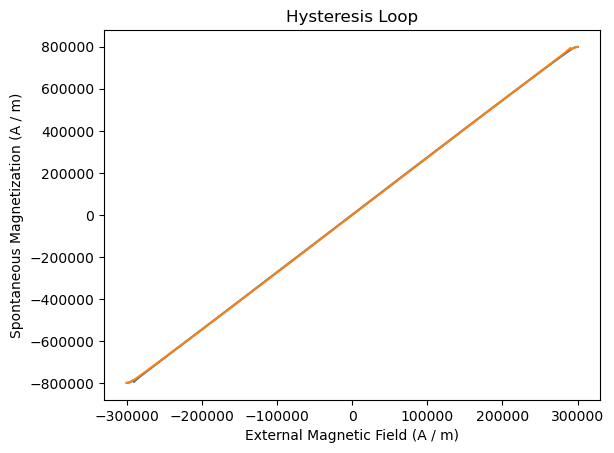

In [13]:
results = read_result(outdir="sweep_3", name="sensor")
results.plot();